# Работа с геоданными

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy import stats
from datetime import datetime
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib import cm
from matplotlib.cm import ScalarMappable
import folium
from folium.plugins import HeatMap

## 1. Загрузите агрегированные данные о поездках в мае 2016. Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.

### В начале повторим начало предыдуей работы

In [2]:
data = pd.read_csv('yellow_tripdata_2016-05.csv')

In [3]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [4]:
regions = pd.read_csv('regions.csv', sep =';')

In [5]:
data = data[data.tpep_pickup_datetime != data.tpep_dropoff_datetime]
data = data[data.passenger_count != 0]
data = data[data.trip_distance != 0]
data_filter = data[(data.pickup_longitude >= -74.25559) & 
            (data.pickup_longitude <= -73.70001) &
            (data.pickup_latitude >= 40.49612) &
            (data.pickup_latitude <= 40.91553)]

In [6]:
data_filter.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [7]:
data_filter['tpep_pickup_datetime'] = data_filter['tpep_pickup_datetime'].apply(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S'))

C:\Users\ptupi\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
data_filter['pickup_hour'] = data_filter['tpep_pickup_datetime'].apply(lambda t: t.replace(minute=0, second=0))

C:\Users\ptupi\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
binx = np.append(regions.west.unique(),regions.east.max())
biny = np.append(regions.south.unique(),regions.north.max())
np.append(regions.west.unique(),regions.east.max())
biny = np.append(regions.south.unique(),regions.north.max())
regions['for_check_lon'] = (regions['west'] + regions['east'])/2
regions['for_check_lat'] = (regions['north'] + regions['south'])/2

r = stats.binned_statistic_2d(regions.for_check_lon.values,\
                              regions.for_check_lat.values,\
                              None, statistic='count', bins=[binx,biny],\
                              expand_binnumbers = True)
regions['check_region0'] = r.binnumber[0]
regions['check_region1'] = r.binnumber[1]

In [10]:
r = stats.binned_statistic_2d(data_filter.pickup_longitude.values,\
                              data_filter.pickup_latitude.values,\
                              None, statistic='count', bins=[binx,biny],\
                              expand_binnumbers = True)
data_filter['region'] = [50*(a-1)+b for a,b in zip(r.binnumber[0],r.binnumber[1])]
data_filter.head()

C:\Users\ptupi\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,region
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,2016-05-01,1233
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,2016-05-01,1180
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,2016-05-01,1180
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,2016-05-01,1173
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,2016-05-01,1130


In [11]:
refion_zero = 0
time_values = []
for day in range(1,31+1):
    for hour in range(24):
        time_values.append(datetime(2016,5,day,hour,0,0))
region_values = range(1,2500+1)

idx = pd.MultiIndex.from_product([time_values,region_values],
                                 names=['pickup_hour', 'region'])
columns = np.array(['count'])
result = pd.DataFrame(np.zeros(idx.shape+columns.shape),index = idx, columns=columns)
result_values = data_filter.groupby(['pickup_hour','region'])['region'].count().to_frame()
result_values.columns = ['count']
result = result.add(result_values,fill_value=0)
result.head()

count
pickup_hour region       
2016-05-01  1         0.0
            2         0.0
            3         0.0
            4         0.0
            5         0.0

In [32]:
data_field = [0]* 2500
for d in data_filter.region:
    data_field[d]+=1
regions['coununt'] = data_field

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 14, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 4, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 75, 74, 30, 13, 0, 1, 1, 0, 

In [12]:
print ('По {} регионам не было совершино ни одной поездки'.format(2500 - len(set(data_filter.region))))

По 1283 регионам не было совершино ни одной поездки


##  2.Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.

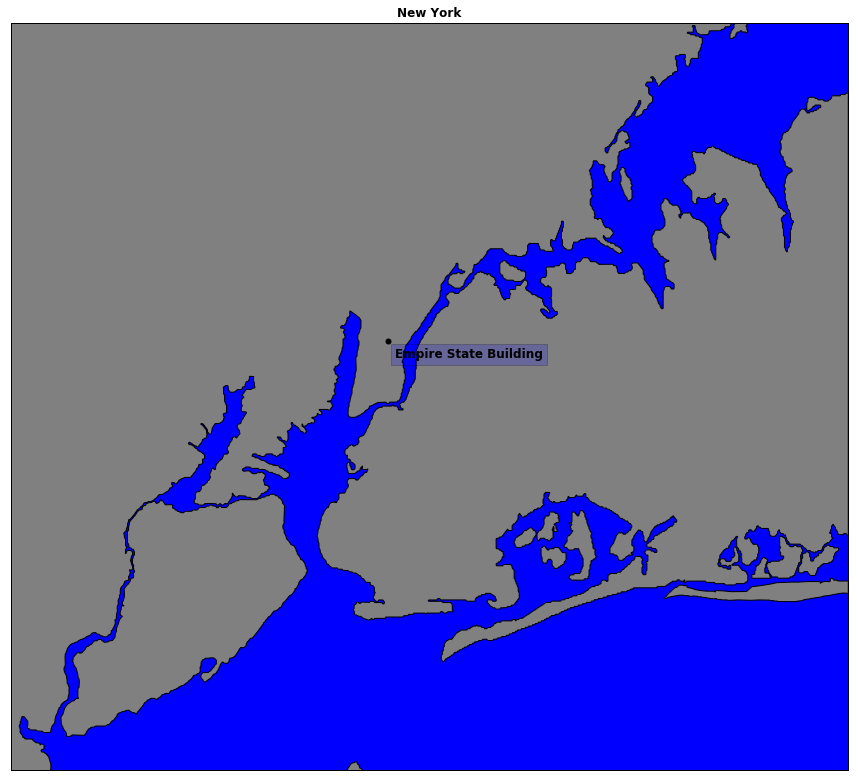

In [14]:
map = Basemap(llcrnrlon=-74.3,llcrnrlat=40.475,urcrnrlon=-73.6,urcrnrlat=40.95,
             resolution='f', projection='tmerc', lat_0 = 40.8, lon_0 = -74,
             width = 10000, height = 10000)
fig = plt.figure(figsize=(15, 15))
map.drawmapboundary(fill_color='blue')
map.fillcontinents(color='grey',lake_color='aqua')
map.drawcoastlines()
#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='coral',lake_color='aqua')
#map.drawcoastlines()

x, y = map(-73.98, 40.74)
plt.text(x, y, 'Empire State Building',fontsize=12,fontweight='bold',
                   ha='left',va='center',color='k',
                   bbox=dict(facecolor='b', alpha=0.2))

x, y = map(-73.9856715,  40.7484831)

plt.plot(x, y, 'ok', markersize=5)
plt.title('New York',weight='bold')

plt.show()

## 3. Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

In [39]:
mapper = cm.ScalarMappable(norm=cm.colors.LogNorm(vmin=1, vmax=np.max(data_field)), cmap=cm.Oranges)
def draw_poly( x1, x2, y1, y2, t, n):
    poly = Polygon([t(x1,y1),t(x1,y2),t(x2,y2),t(x2,y1)], facecolor=mapper.to_rgba(n), alpha=0.4, linewidth=1,edgecolor='k')
    plt.gca().add_patch(poly)

In [66]:
may = regions[['region', 'coununt']].groupby(['region']).agg('sum')
agg_regions = may.reset_index().rename_axis(None).join(regions, on = 'region', lsuffix = 'l')

C:\Users\ptupi\Anaconda2\lib\site-packages\matplotlib\colors.py:462: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])
C:\Users\ptupi\Anaconda2\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


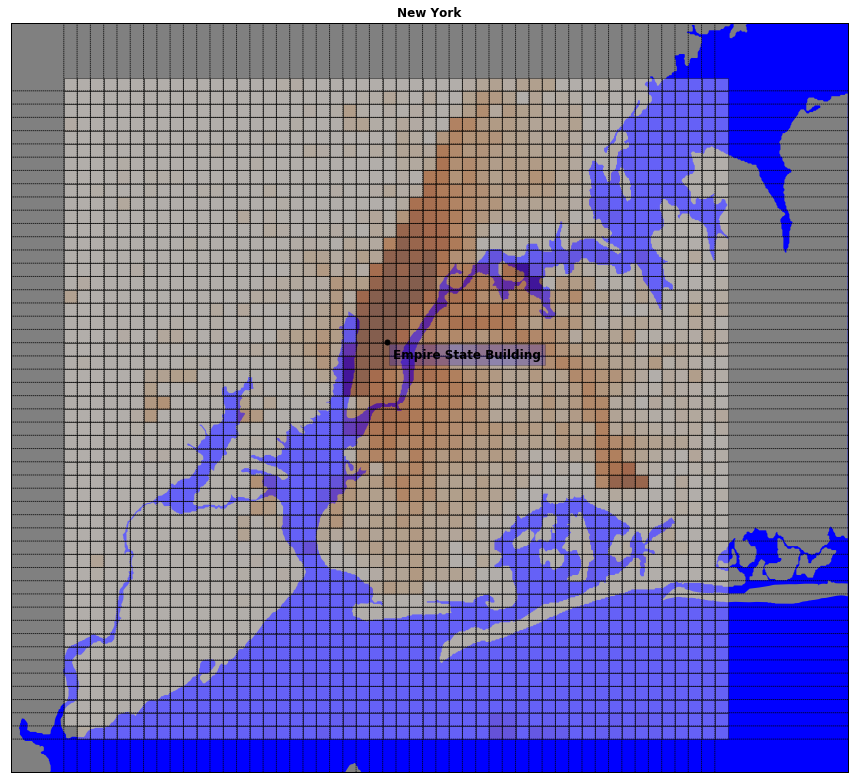

In [71]:
m= Basemap(projection='merc',llcrnrlon=-74.3,llcrnrlat=40.475,urcrnrlon=-73.6,urcrnrlat=40.95,
             resolution='f', lat_0 = 40.8, lon_0 = -74)
fig = plt.figure(figsize=(15, 15))

m.drawmapboundary(fill_color='blue')
m.fillcontinents(color='grey',lake_color='aqua')

x, y = map(-73.98, 40.74)
plt.text(x, y, 'Empire State Building',fontsize=12,fontweight='bold',
                   ha='left',va='center',color='k',
                   bbox=dict(facecolor='b', alpha=0.2))

m.drawparallels(list(set(regions.south)))
m.drawmeridians(list(set(regions.west)))
x, y = map(-73.9856715,  40.7484831)

plt.plot(x, y, 'ok', markersize=5)
plt.title('New York',weight='bold')

for x in agg_regions.values:
    draw_screen_poly(x[3], x[4], x[5], x[6], m, x[1])
plt.show()

## 4. Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

In [174]:
new_york_coordinates = (40.75, -74.00)
map_inter = folium.Map(location=new_york_coordinates, zoom_start=10)
folium.Marker([40.6892494, -74.0445004]).add_to(map_inter)
map_inter

## 5. Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

In [187]:
regions2 = agg_regions[agg_regions.coununt > 0]
regions2['latitude'] = (nonzero_agg_withregions.south + nonzero_agg_withregions.north)/2
regions2['longitude'] = (nonzero_agg_withregions.west + nonzero_agg_withregions.east)/2
regions2.head()


C:\Users\ptupi\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ptupi\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,regionl,coununtl,region,west,east,south,north,for_check_lon,for_check_lat,check_region0,check_region1,coununt,counter_mean,latitude,longitude
14,15,0,16.0,-74.25559,-74.244478,40.621943,40.630331,-74.250034,40.626137,1.0,16.0,1.0,0.001344,40.626137,-74.250034
15,16,1,17.0,-74.25559,-74.244478,40.630331,40.638719,-74.250034,40.634525,1.0,17.0,1.0,0.001344,40.634525,-74.250034
24,25,0,26.0,-74.25559,-74.244478,40.705825,40.714213,-74.250034,40.710019,1.0,26.0,1.0,0.001344,40.710019,-74.250034
26,27,0,28.0,-74.25559,-74.244478,40.722601,40.730990,-74.250034,40.726795,1.0,28.0,1.0,0.001344,40.726795,-74.250034
31,32,0,33.0,-74.25559,-74.244478,40.764542,40.772931,-74.250034,40.768737,1.0,33.0,19.0,0.025538,40.768737,-74.250034


In [188]:
lat = list(regions2['latitude'])
longg = list(regions2['longitude'])
summ = list(regions2['coununt'])
arr = zip(lat, longg, summ)

In [189]:
new_york_coordinates = (40.75, -74.00)
map_inter2 = folium.Map(location=new_york_coordinates, zoom_start=10)
folium.Marker(location=[40.689166676667, -74.044583343333], popup='Statue_of_Liberty').add_to(map_ny)
HeatMap(arr, radius=7).add_to(map_inter2)        
map_inter2

#### На карте явно анамалия, поездки не могут начинаться не на суше

## 6. Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.

In [182]:
agg_regions['counter_mean'] = agg_regions['coununt'] / (31*24)
high = agg_regions[agg_regions['counter_mean'] >= 5]
print ('Количество регионов с средним кол-вом поездок в час больше 5 = %s' % high.shape[0])

high['latitude'] = (high.south + high.north)/2
high['longitude'] = (high.west + high.east)/2

lat = list(high['latitude'])
longg = list(high['longitude'])
summ = list(high['coununt'])

arr = zip(lat, longg, summ) #спиок для heatmap
arr

Количество регионов с средним кол-вом поездок в час больше 5 = 102


C:\Users\ptupi\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ptupi\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[(40.710019099999997, -74.016690600000004, 49699.0),
 (40.718407299999996, -74.016690600000004, 102870.0),
 (40.726795499999994, -74.016690600000004, 64581.0),
 (40.710019099999997, -74.005578999999997, 49135.0),
 (40.718407299999996, -74.005578999999997, 135328.0),
 (40.726795499999994, -74.005578999999997, 198724.0),
 (40.7351837, -74.005578999999997, 219755.0),
 (40.743571899999999, -74.005578999999997, 252281.0),
 (40.751960100000005, -74.005578999999997, 312948.0),
 (40.760348300000004, -74.005578999999997, 107352.0),
 (40.768736500000003, -74.005578999999997, 33144.0),
 (40.6848545, -73.994467399999991, 4914.0),
 (40.693242699999999, -73.994467399999991, 16625.0),
 (40.701630899999998, -73.994467399999991, 19069.0),
 (40.710019099999997, -73.994467399999991, 8320.0),
 (40.718407299999996, -73.994467399999991, 15011.0),
 (40.726795499999994, -73.994467399999991, 200241.0),
 (40.7351837, -73.994467399999991, 310552.0),
 (40.743571899999999, -73.994467399999991, 350575.0),
 (40.7519

In [185]:
new_york_coordinates = (40.75, -74.00)
map_inter3 = folium.Map(location=new_york_coordinates, zoom_start=10)

HeatMap(arr, radius=7).add_to(map_inter3)        
map_inter3

# Выводы: В данной работе была проведена работа с геоданными, изучены модули Basemap и  folium, выделены наиболее оживленные регионы